# Rodrigo Burberg 
# Project 5 - Clustering Techniques 

Context:

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help
Objective: To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

Dataset:  ALLLife bank
Data Description: Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.

Apply the concepts and techniques you have learned in the previous weeks and summarize your insights at the end.


Key Questions:

Perform EDA.

Apply Clustering Algorithms and mentions how many clusters are formed ?

How are these segments different from each other?

What are your recommendations to the bank on how to better market to and service these customers?


In [117]:
#this loads the rating file 

#UserRating = pd.read_csv('data.csv')
#UserRating.head()



In [118]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore


from sklearn.cluster import AgglomerativeClustering 




from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage,cophenet
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

import warnings
warnings.filterwarnings('ignore')

In [119]:
#import sklearn.metrics

Cust_Data = pd.read_csv("Credit Card Customer Data.csv")
Cust_Data.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [120]:
Cust_Data.shape

(660, 7)

In [121]:
Cust_Data.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


## EDA 

In [122]:
#creating a copy of the data 

Cust_Data1 = Cust_Data.copy()

In [123]:
Cust_Data1.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [124]:
# lets us look at the structure of the data
Cust_Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [125]:
#Dropping SL_No and Customer Key since it does not provide any insight to the data

Cust_Data1 = Cust_Data1.drop(['Sl_No', 'Customer Key'], axis=1)



In [126]:
Cust_Data1.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [127]:
# Function to create boxplot and histogram for any input numerical variable
# Uni-variate analysis of numerical variables showing their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram





In [128]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
        
    plt.show() # show the plot

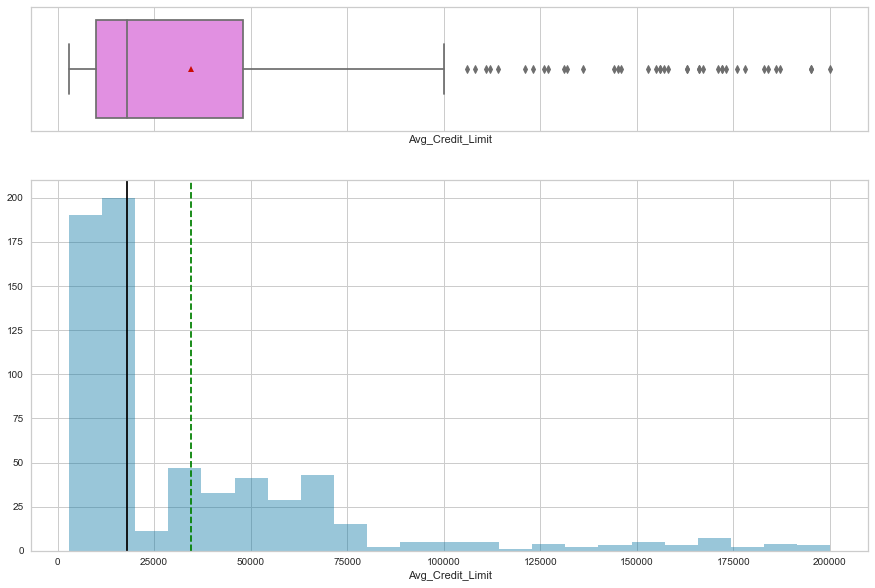

In [129]:
histogram_boxplot(Cust_Data1['Avg_Credit_Limit'])

* Avg Credit Limit is the only numerical variable we have 

* Positively skewed data with a large number of outliers 

* Will not treat or delete this data since it is representative of the real world; 

* Min = 3000, if the minimum was zero we would have to replace these values. 

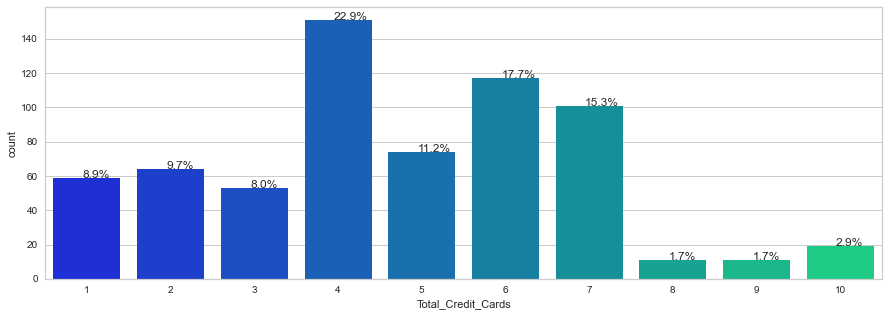

In [130]:
#Total_Credit_Cards Observation

plt.figure(figsize=(15,5))
ax = sns.countplot(Cust_Data1["Total_Credit_Cards"],palette='winter')
perc_on_bar(ax,Cust_Data1["Total_Credit_Cards"])

* From the total number of credit cards we can see that the customers could be grouped into 3 clusters 

* cluster 1 - 1-3 credit cards - account for 8-10% of customer per number of credit card  

* cluster 2 - 4-7 credit cards - account for 11-23% of customer per number of credit cards 

* cluster 3 - 8-10 credit cards - account for 3% of customer per number of credit cards 

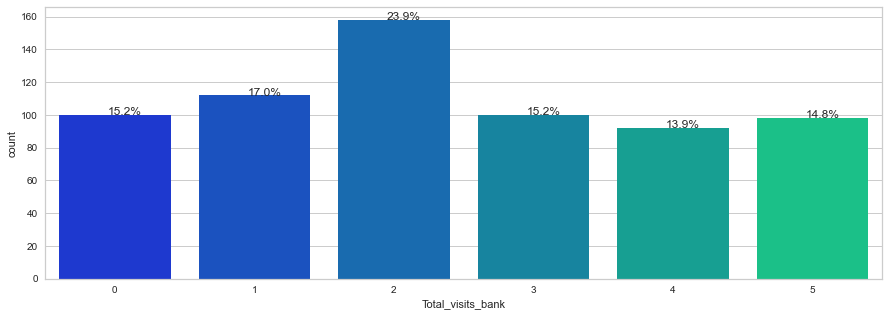

In [131]:
#Total_visits_bank Observation

plt.figure(figsize=(15,5))
ax = sns.countplot(Cust_Data1["Total_visits_bank"],palette='winter')
perc_on_bar(ax,Cust_Data1["Total_visits_bank"])

* Total number of bank visits have about the same per visit (14-17%), except for 2 visits that has 23.9% 

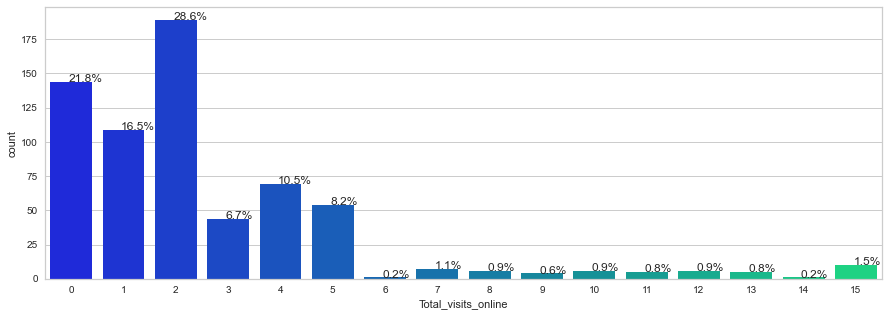

In [132]:
#Total_visits_online Observation

plt.figure(figsize=(15,5))
ax = sns.countplot(Cust_Data1["Total_visits_online"],palette='winter')
perc_on_bar(ax,Cust_Data1["Total_visits_online"])

* The majority of customers visited used online banking 0 - 5 times (about 92.3%)

* Customers that used online banking 6-15 times account only account for 7.7% (less that 1.5% for each) 

* will not treat this data since it is representative of the real world and any outliers will most likely be grouped together 


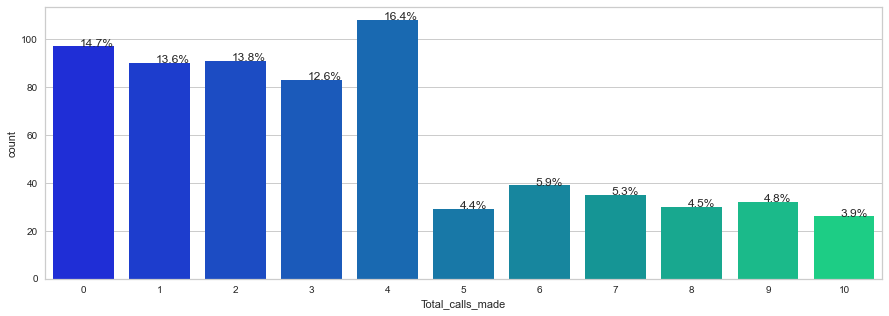

In [133]:
#Total_calls_made Observation

plt.figure(figsize=(15,5))
ax = sns.countplot(Cust_Data1["Total_calls_made"],palette='winter')
perc_on_bar(ax,Cust_Data1["Total_calls_made"])

* From the total calls made 2 groups can be easily identified 

* 1: customers making 0 - 4 calls (more than 12% for each call number and 71.1% in total)
    
* 2: customers making 5 - 10 calls (less than 6% for each call number and 28.9% in total)

In [134]:
# lets check duplicate observations
Cust_Data1.duplicated().sum()

11

* duplicate obervations must be deleted since they do not add value to the algorithm

In [135]:
#deleting duplicates 

Cust_Data1 = Cust_Data1[(~Cust_Data1.duplicated())].copy()

In [136]:
# checking missing values
Cust_Data1.isna().sum()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

* No missing values, we can move forward 

In [137]:
Cust_Data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 649 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     649 non-null    int64
 1   Total_Credit_Cards   649 non-null    int64
 2   Total_visits_bank    649 non-null    int64
 3   Total_visits_online  649 non-null    int64
 4   Total_calls_made     649 non-null    int64
dtypes: int64(5)
memory usage: 30.4 KB


## BiVariate Analysis

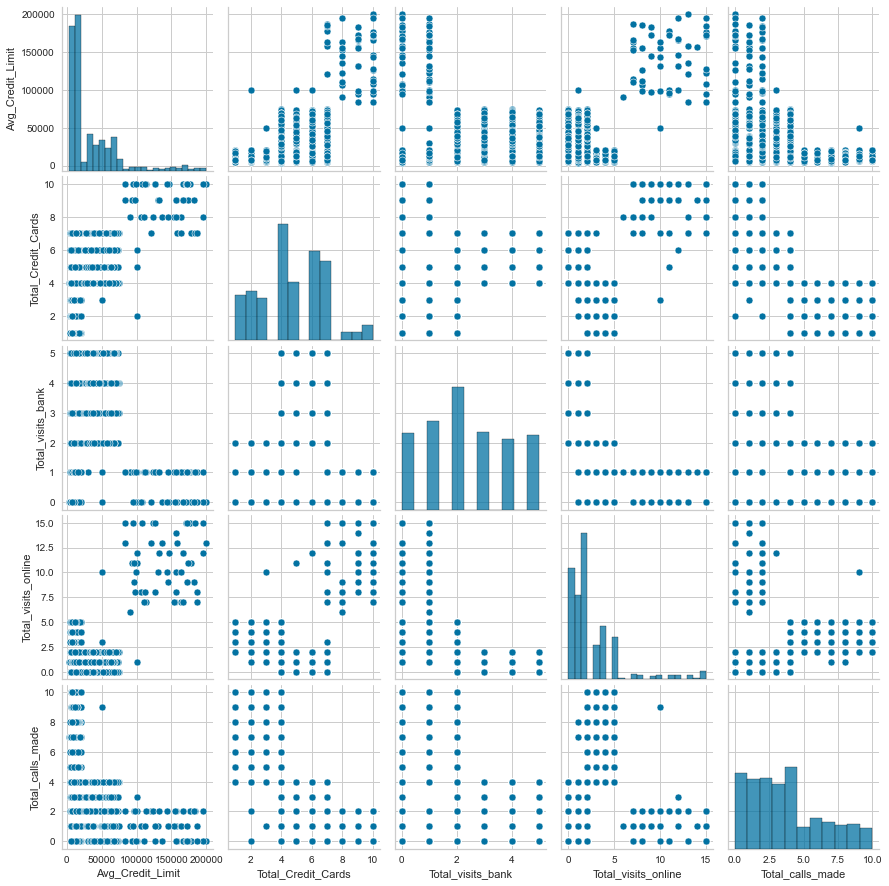

In [138]:
sns.pairplot(Cust_Data1)

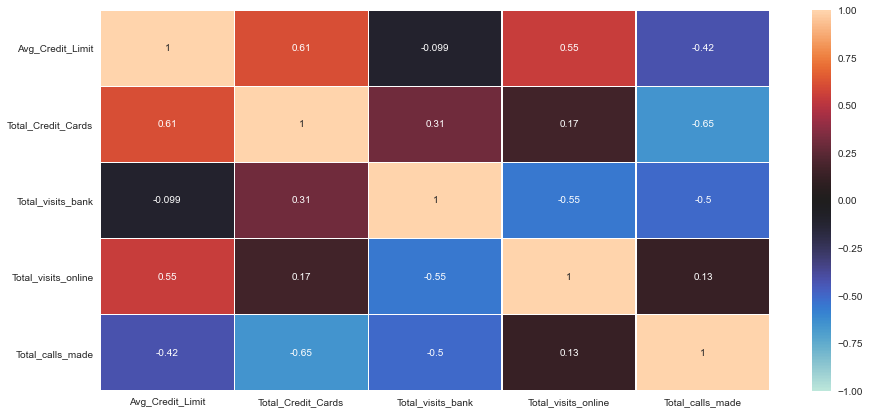

In [139]:
plt.figure(figsize=(15,7))

sns.heatmap(Cust_Data1.corr(),
            annot=True,
            linewidths=0.5,vmin=-1,vmax=1,
            center=0,
            cbar=True,)            

plt.show()

* Total credit cards and Avg credit card limit have a 0.61 postivie correlation.

* Total credit cards and Total calls made have a negative correlation of -0.65.

* Total vists online and avg credit limit have a 0.55 positive correlation.

* Total visits online and total visits banks have a -0.55 negative correlted. This makes because people will either go to the bank physically or do their business online. 

In [140]:
# Scaling the dataset before clustering
scaler=StandardScaler()
subset=Cust_Data1.copy()
subset_scaled=scaler.fit_transform(subset)  

In [141]:
# Creating a dataframe of the above results
subset_scaled_Cust_Data1=pd.DataFrame(subset_scaled,columns=subset.columns)

Number of Clusters: 1 	Average Distortion: 2.007896349270688
Number of Clusters: 2 	Average Distortion: 1.4576197022077821
Number of Clusters: 3 	Average Distortion: 1.1434401208195095
Number of Clusters: 4 	Average Distortion: 1.0435538595477063
Number of Clusters: 5 	Average Distortion: 0.9877896646529043
Number of Clusters: 6 	Average Distortion: 0.9403272824674529
Number of Clusters: 7 	Average Distortion: 0.9073166756375903
Number of Clusters: 8 	Average Distortion: 0.8887003266880149
Number of Clusters: 9 	Average Distortion: 0.8637118331299778
Number of Clusters: 10 	Average Distortion: 0.8494817960244997


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

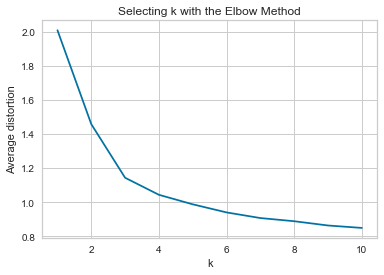

In [142]:
clusters=range(1,11)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(subset_scaled_Cust_Data1)
    prediction=model.predict(subset_scaled_Cust_Data1)
    distortion=sum(np.min(cdist(subset_scaled_Cust_Data1, model.cluster_centers_, 'euclidean'), axis=1)) / subset_scaled_Cust_Data1.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

* Using the Elbow method we can see that the optimal value for k is 3 

For n_clusters = 2, silhouette score is 0.41800025566689647)
For n_clusters = 3, silhouette score is 0.516281010855363)
For n_clusters = 4, silhouette score is 0.3570238219413198)
For n_clusters = 5, silhouette score is 0.2730908848204728)
For n_clusters = 6, silhouette score is 0.25643053775389374)
For n_clusters = 7, silhouette score is 0.23542021315438708)
For n_clusters = 8, silhouette score is 0.2266937443271163)
For n_clusters = 9, silhouette score is 0.22611657551219083)


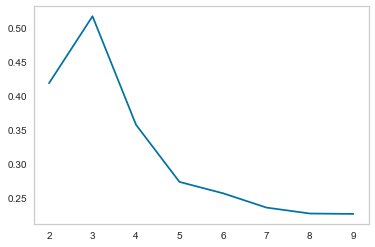

In [143]:
sil_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_Cust_Data1))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_Cust_Data1, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list,sil_score)
plt.grid()

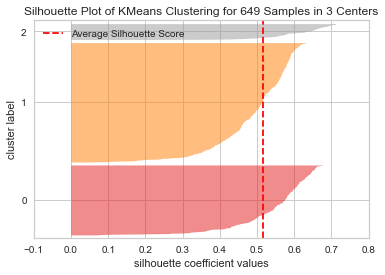

In [144]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state = 1))
visualizer.fit(subset_scaled_Cust_Data1)    
visualizer.show();

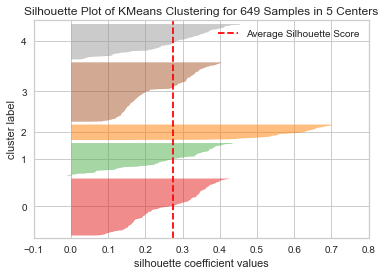

In [145]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state = 1))
visualizer.fit(subset_scaled_Cust_Data1)    
visualizer.show();

* The Silhouette coefficient is another way to determine to optimal number of cluster. 

* The Silhouette coefficient was highest for k = 3. The higher the silhouette coefficient the better

In [146]:
# lets us take 3 as number of clusters
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(subset_scaled_Cust_Data1)

KMeans(n_clusters=3, random_state=1)

In [147]:
Cust_Data1['K_means_segments'] = kmeans.labels_
subset_scaled_Cust_Data1['K_means_segments'] = kmeans.labels_

In [148]:
cluster_profile_KM = Cust_Data1.groupby('K_means_segments').mean()

In [149]:
cluster_profile_KM['count_in_each_segments'] = Cust_Data1.groupby('K_means_segments')['Total_visits_online'].count().values

In [150]:
# lets display cluster profile
cluster_profile_KM.style.highlight_max(color = 'lightgreen', axis = 0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
K_means_segments,,,,,,
0,34071.428571,5.518519,3.484127,0.981481,1.992063,378
1,12239.819005,2.411765,0.945701,3.561086,6.891403,221
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


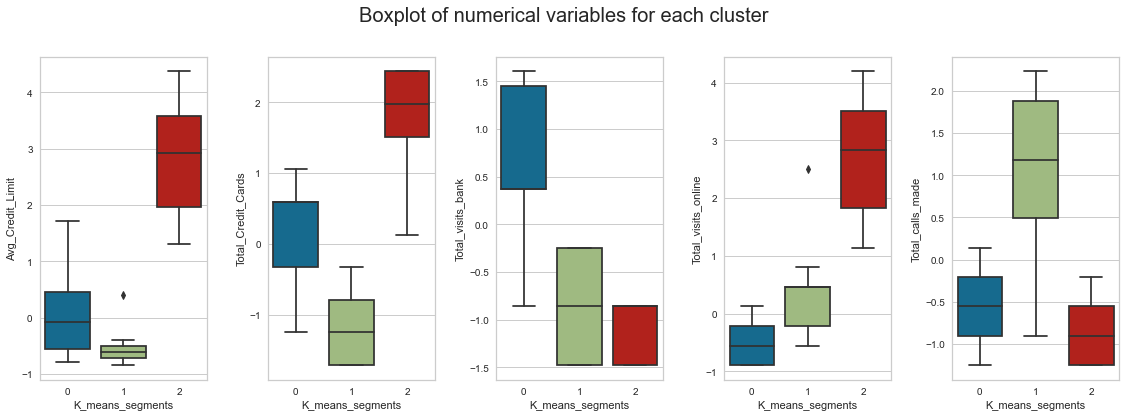

In [151]:
all_col = Cust_Data1.select_dtypes(include=np.number).columns.tolist()

fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=subset_scaled_Cust_Data1[all_col[counter]],x=subset_scaled_Cust_Data1['K_means_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

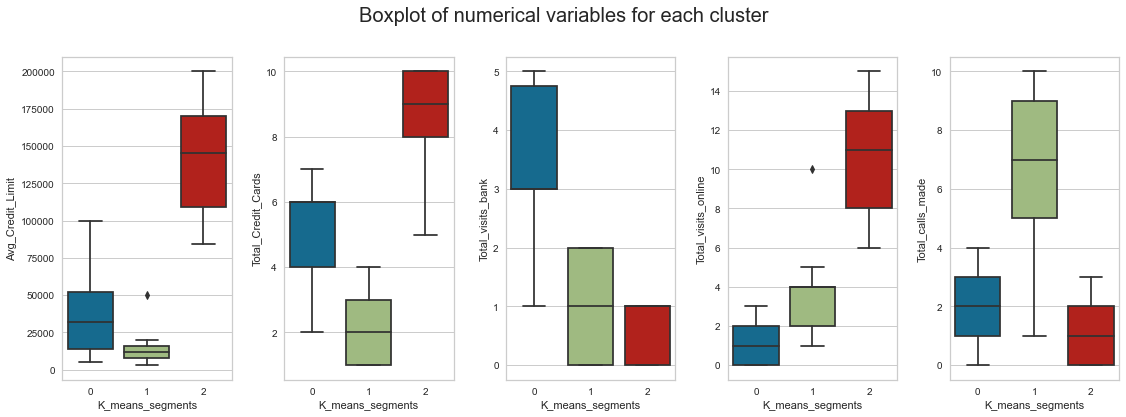

In [152]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=Cust_Data1[all_col[counter]],x=Cust_Data1['K_means_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

In [ ]:
# Moving into HC 

In [153]:

# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering
distance_metrics = [ 'euclidean','chebyshev','mahalanobis','cityblock']
linkage_methods = ['single', 'complete', 'average', 'weighted']
high_cophenet_corr = 0
high_dm_lm = [0,0]
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_Cust_Data1, metric=dm, method=lm)
        c, coph_dists = cophenet(Z , pdist(subset_scaled_Cust_Data1))
        print('Cophent correlation for distance metrics {} and linkage method {} is {}'.format(dm,lm,c))
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
            



Cophent correlation for distance metrics euclidean and linkage method single is 0.8782863872563746
Cophent correlation for distance metrics euclidean and linkage method complete is 0.8854872581962318
Cophent correlation for distance metrics euclidean and linkage method average is 0.9167886114950704
Cophent correlation for distance metrics euclidean and linkage method weighted is 0.9107193273405108
Cophent correlation for distance metrics chebyshev and linkage method single is 0.8976424680148912
Cophent correlation for distance metrics chebyshev and linkage method complete is 0.8731535021949083
Cophent correlation for distance metrics chebyshev and linkage method average is 0.9155524410807189
Cophent correlation for distance metrics chebyshev and linkage method weighted is 0.8894795319631006
Cophent correlation for distance metrics mahalanobis and linkage method single is 0.8953021845210313
Cophent correlation for distance metrics mahalanobis and linkage method complete is 0.70716728850

In [154]:
print('Highest cophenet correlation is {}, which is obtinaed with {} distance metric and {} linkage method'.format(high_cophenet_corr ,high_dm_lm[0],high_dm_lm[1]))

Highest cophenet correlation is 0.9167886114950704, which is obtinaed with euclidean distance metric and average linkage method


### Lets explore 'centroid', 'median','ward' linkage method which requires only Euclidean distance metrics

In [155]:
linkage_methods = ['single', 'complete', 'average','median','ward', 'weighted']
high_cophenet_corr = 0
high_dm_lm = [0,0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_Cust_Data1, metric='euclidean', method=lm)
    c, coph_dists = cophenet(Z , pdist(subset_scaled_Cust_Data1))
    print('Cophent correlation for distance metrics {} and linkage method {} is {}'.format('euclidean',lm,c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = dm
        high_dm_lm[1] = lm
print('*'*110)
print('Highest cophenet correlation is {}, which is obtinaed with {} distance metric and {} linkage method'.format(high_cophenet_corr ,'euclidean',high_dm_lm[1]))

Cophent correlation for distance metrics euclidean and linkage method single is 0.8782863872563746
Cophent correlation for distance metrics euclidean and linkage method complete is 0.8854872581962318
Cophent correlation for distance metrics euclidean and linkage method average is 0.9167886114950704
Cophent correlation for distance metrics euclidean and linkage method median is 0.8888158900099539
Cophent correlation for distance metrics euclidean and linkage method ward is 0.7756167152597446
Cophent correlation for distance metrics euclidean and linkage method weighted is 0.9107193273405108
**************************************************************************************************************
Highest cophenet correlation is 0.9167886114950704, which is obtinaed with euclidean distance metric and average linkage method


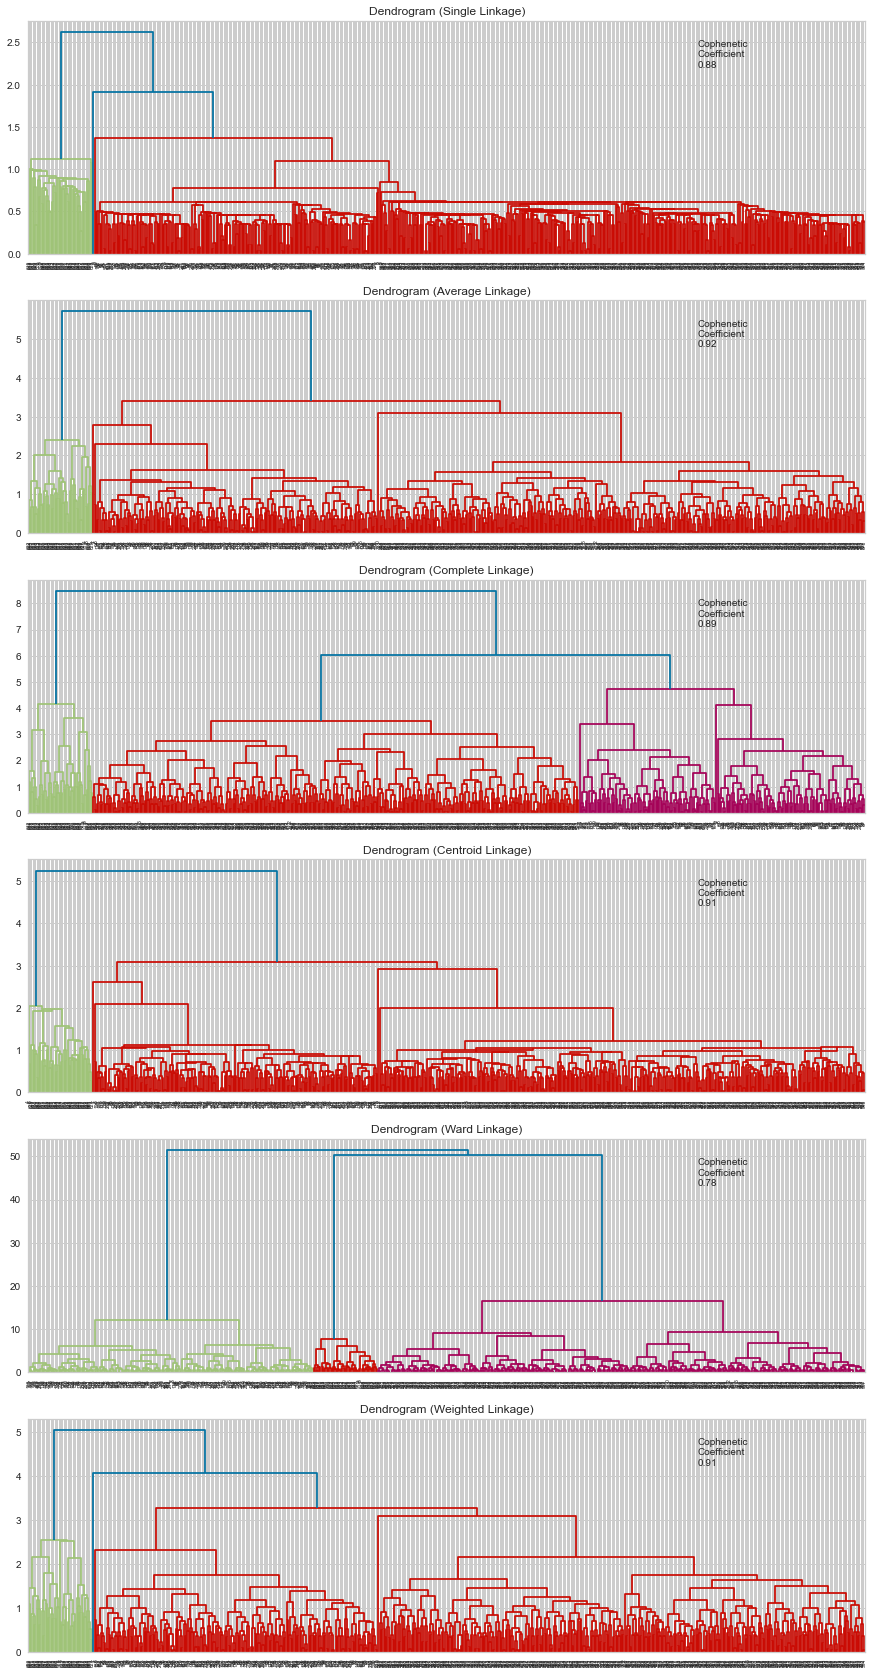

In [156]:
# List of all linkage methods to check
methods = ['single',
           'average', 
           'complete',
           'centroid',
           'ward',
          'weighted']

# Create lists to save results of coph calculation
compare_cols = ['Linkage', 'Cophenetic Coefficient']
compare = []

# Create a subplot image
fig, axs = plt.subplots(len(methods), 1, figsize=(15, 30))

# Enumerate through the list of all methods above
# Get linkage, plot dendrogram, calculate cophenetic coefficient
for i, method in enumerate(methods):
    
    Z = linkage(subset_scaled_Cust_Data1, metric='euclidean', method=method)

    dendrogram(Z, ax=axs[i]);
    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')
    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_Cust_Data1))
    axs[i].annotate(f'Cophenetic\nCoefficient\n{coph_corr:0.2f}', 
                    (0.80, 0.80),
                    xycoords='axes fraction')
    compare.append([method, coph_corr])

In [157]:
# Create and print dataframe to compare Cophenetic Coefficient for each linkage
Cust_Data1_cc = pd.DataFrame(compare, columns=compare_cols)

Cust_Data1_cc

,Linkage,Cophenetic Coefficient
0,single,0.878286
1,average,0.916789
2,complete,0.885487
3,centroid,0.914034
4,ward,0.775617
5,weighted,0.910719


- Let us see the dendrogram of 'cityblock','chebyshev' with 'average' and 'weighted' linkage method as they gave high cophenetic correlation value

In [158]:
distance_metrics = [ 'cityblock','chebyshev']
linkage_methods = ['average', 'weighted']

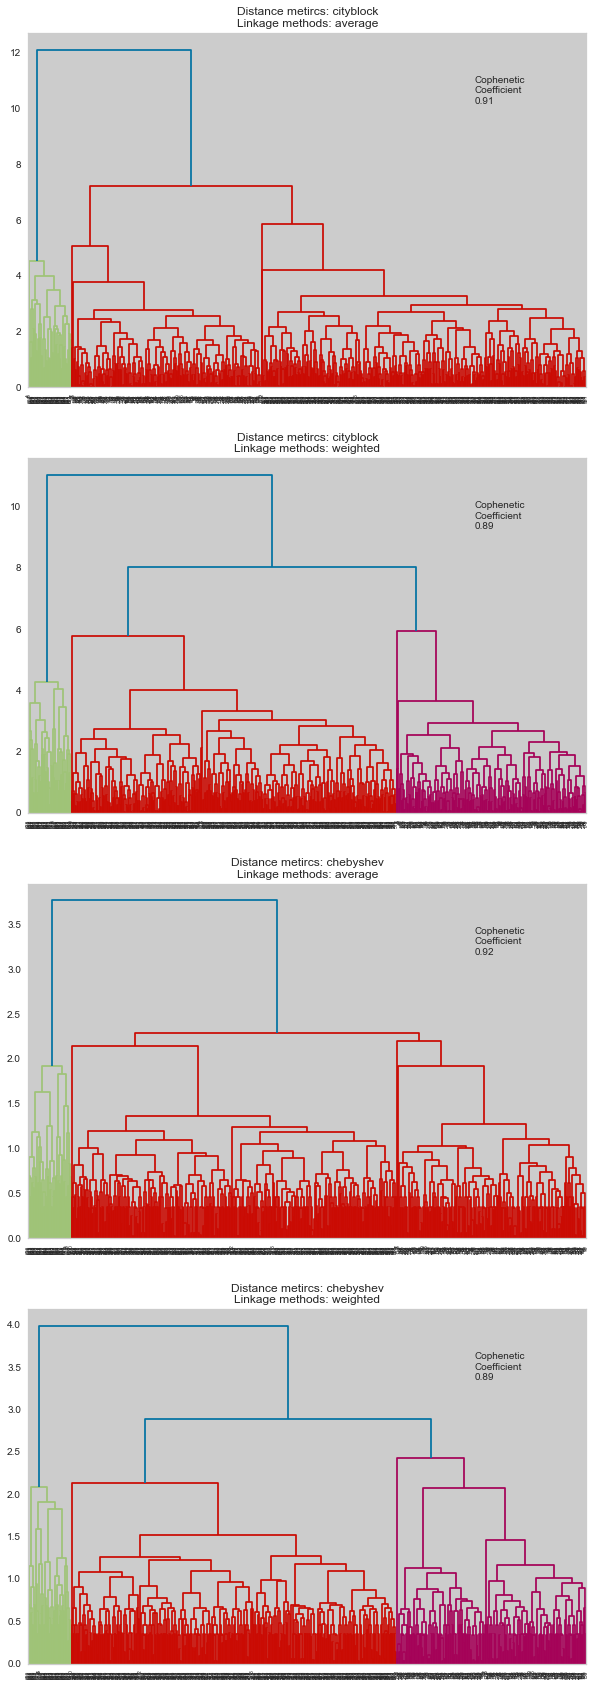

In [159]:
# Create a subplot image
fig, axs = plt.subplots(len(distance_metrics)+len(distance_metrics), 1, figsize=(10, 30))
i=0
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_Cust_Data1, metric=dm, method=lm)
        dendrogram(Z,  ax=axs[i]);
        axs[i].set_title('Distance metircs: {}\nLinkage methods: {}'.format(dm,lm))
        coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_Cust_Data1))
        axs[i].annotate(f'Cophenetic\nCoefficient\n{coph_corr:0.2f}', 
                        (0.80, 0.80),
                        xycoords='axes fraction')
        axs[i].set_title('Distance metircs: {}\nLinkage methods: {}'.format(dm,lm))                        
        i +=1
       

# Observations 

* We will use the Eculidean distance with ward linkage method since it has 3 distinct and seperate clusters 

In [160]:
# Creating Clusters 

In [161]:
# K value as 3
HCmodel = AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='ward')
HCmodel.fit(subset_scaled_Cust_Data1)
subset_scaled_Cust_Data1['HC_Clusters'] = HCmodel.labels_

In [162]:
Cust_Data1['HC_Clusters'] = HCmodel.labels_

In [163]:
cluster_profile_HC = Cust_Data1.groupby('HC_Clusters').mean()

In [164]:
cluster_profile_HC['count_in_each_segments'] = Cust_Data1.groupby('HC_Clusters')['Avg_Credit_Limit'].count().values

In [166]:
# lets display cluster profile
cluster_profile_HC.style.highlight_max(color = 'lightgreen', axis = 0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,
0,34071.428571,5.518519,3.484127,0.981481,1.992063,0,378
1,12239.819005,2.411765,0.945701,3.561086,6.891403,1,221
2,141040.000000,8.740000,0.600000,10.900000,1.080000,2,50


In [167]:
# lets display cluster profile
cluster_profile_KM.style.highlight_max(color = 'lightgreen', axis = 0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
K_means_segments,,,,,,
0,34071.428571,5.518519,3.484127,0.981481,1.992063,378
1,12239.819005,2.411765,0.945701,3.561086,6.891403,221
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


* This shows that both methods K Means and HC Clustering chose the same customers and grouped them the same, this means that the cluster groups are very seperate and distinct since both algorithms can to the same conclusion 

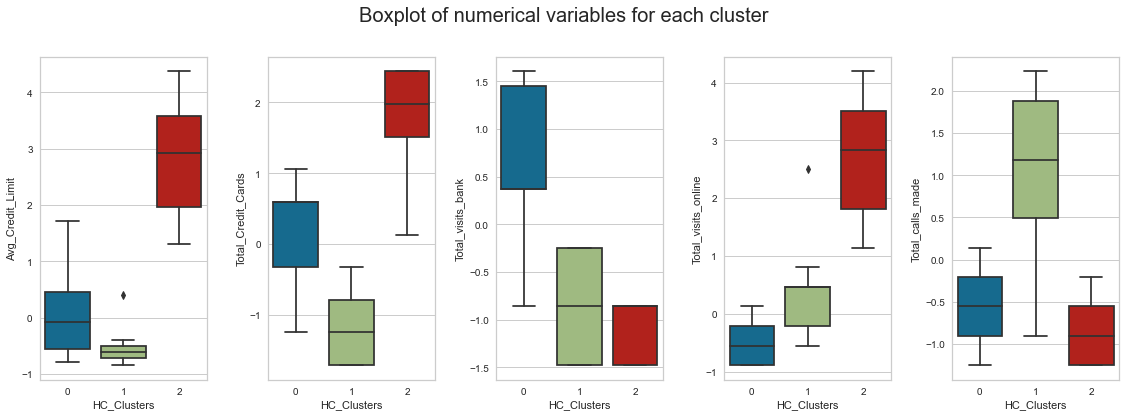

In [169]:
#Customer Clusters are the same for both methods 


all_col = Cust_Data1.select_dtypes(include=np.number).columns.tolist()

fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=subset_scaled_Cust_Data1[all_col[counter]],x=subset_scaled_Cust_Data1['HC_Clusters'])
    counter = counter+1

fig.tight_layout(pad=2.0)

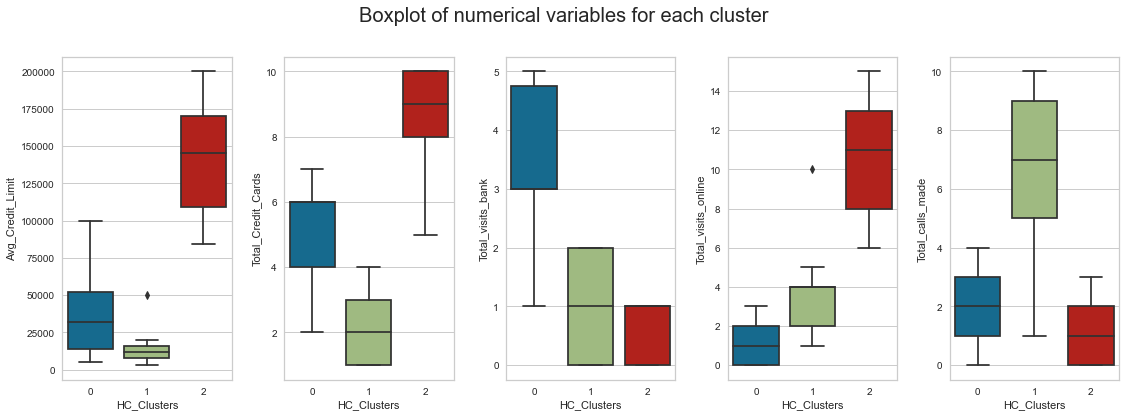

In [171]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=Cust_Data1[all_col[counter]],x=Cust_Data1['HC_Clusters'])
    counter = counter+1

fig.tight_layout(pad=2.0)

# Insights 

* Cluster 0 - have a mid level of credit comparing them to the other clusters 3000-100000(50th percentile 15000-55000), have 2-7 credit cards (50th percentile 4-6), highest bank visits 1 - 5 total bank visits (50th percentile 3-5), have the lowest total visits online 1-5 (50 percentile 2-4), total calls made 1-10 (50th percentile 5-9) 

* Cluster 1 - have a low credit limit about (3000 - 21000), have 1-3 credit cards, 0 - 2 total bank visits, total visits online 1-5 (50 percentile 2-4), total calls made 1-10 (50th percentile 5-9)

* Cluster 2 - Have the highest credit limit of 80000-200000 (50th percentile 110000-170000), have the highest number of credit cards 5 - 10 (50th percentile 8-10), have the lowest visits to the bank 1-2, has the highest online vists 6 - 15 (50th percentile 8-13), have the lowest calls made 0-3 (50th percentile 0-2) 

# Business Recommendations 

* Cluster 0 has the highest bank visits, the bank should make the effort to make offer on a personal basis since this group seems to like going to the bank physically and speak with someone, they also have the lowest level of online visits and a low number of calls 

* Cluster 1 has the lowest level of credit limit, the bank should make efforts to see what customers can raise their credit limit by offering more credit cards since this group has the lowest amount of credit cards. 

* Cluster 1 perfers doing business using the phone so the bank should make an effort to reach these customers and make offers via phone 

* Cluster 2 has the highest level of credit so they have a higher level of purchasing power the bank should focus of these customers especially those with 5-8 credit cards because they are likely to get another credit card 

* Cluster 2 has the lowest level of bank visits but the highest level of online visits, any offers should be done online to this group, the bank should avoid calling these customers since they have the lowest calls made